In [45]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


# Adjust the contrast of the image by applying Histogram Equalization 
# image_equalized = exposure.equalize_adapthist(img)
# plt.imshow(img, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

# Convolve the sharpen kernel and the image
# kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
# image_sharpen = convolve2d(img,kernel)
# print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)

# # Plot the filtered image
# plt.imshow(image_sharpen, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

# # Adjust the contrast of the filtered image by applying Histogram Equalization 
# image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
# plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

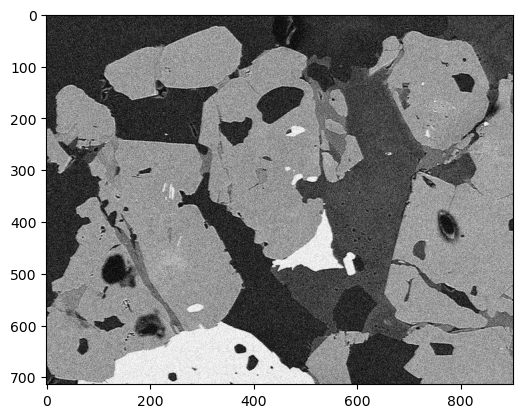

In [46]:
img = io.imread('/Users/rsingh/Downloads/BSE_Google_noisy.jpg')    # Load the image
#img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
plt.imshow(img,cmap=plt.cm.gray)

In [47]:
import scipy.signal

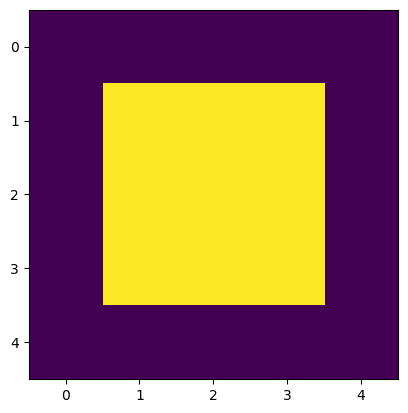

In [52]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = kernel
plt.imshow(kernel_)

In [53]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

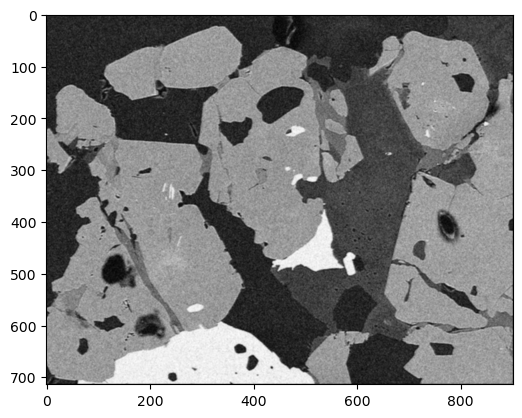

In [54]:
avg1 = convolve2d(img, kernel)
plt.imshow(avg1,cmap=plt.cm.gray)

In [55]:
avg1.dtype

dtype('uint8')

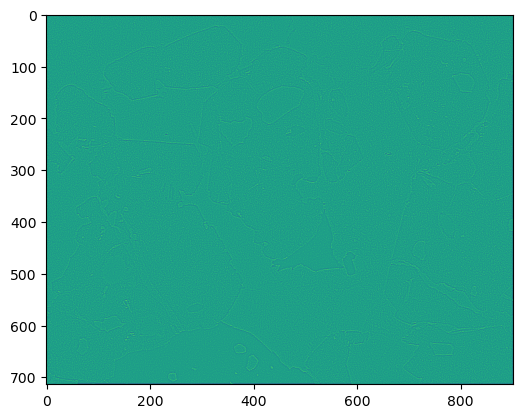

In [56]:
plt.imshow(avg1.astype('int')-img.astype('int'))

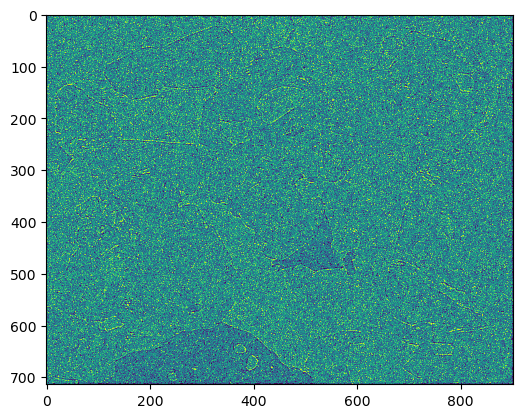

In [57]:
m = np.zeros_like(img)
m[avg1.astype('int')-img.astype('int')>0] = 1
plt.imshow(m)

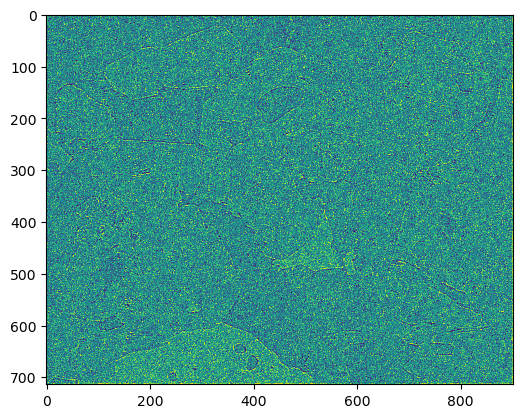

In [58]:
m = np.zeros_like(img)
m[avg1.astype('int')-img.astype('int')<0] = 1
plt.imshow(m)x

In [59]:
kernel = np.array([[1,2,1],[2,3,2],[1,2,1]])
kernel = kernel/np.sum(kernel)

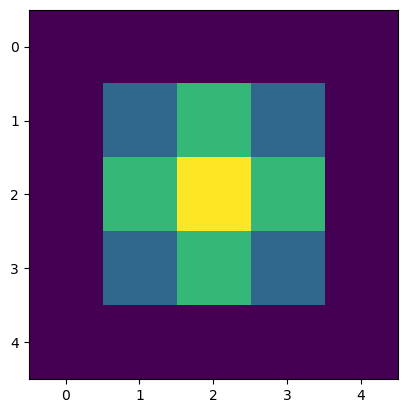

In [60]:
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = kernel
plt.imshow(kernel_)

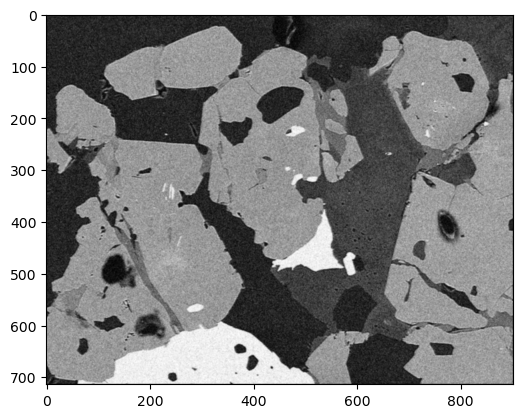

In [61]:
avg2 = convolve2d(img, kernel)
plt.imshow(avg2,cmap=plt.cm.gray)

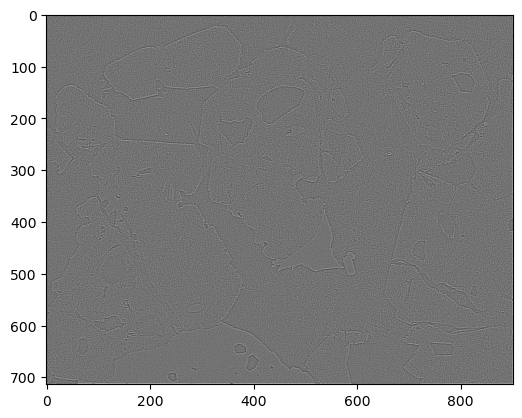

In [62]:
plt.imshow(avg2.astype('int')-avg1.astype('int'),cmap=plt.cm.gray)

In [63]:
kernel.reshape(-1)

array([0.06666667, 0.13333333, 0.06666667, 0.13333333, 0.2       ,
       0.13333333, 0.06666667, 0.13333333, 0.06666667])

In [73]:
from scipy.linalg import circulant

In [74]:
T = circulant(kernel.reshape(-1))

In [75]:
img_ds = img[::10,::10]
i = img_ds.reshape(-1)
k = np.zeros_like(i)
k = k.astype('float32')
k[:len(kernel.reshape(-1))] = kernel.reshape(-1)
T = circulant(k.T)

In [76]:
T.shape

(6552, 6552)

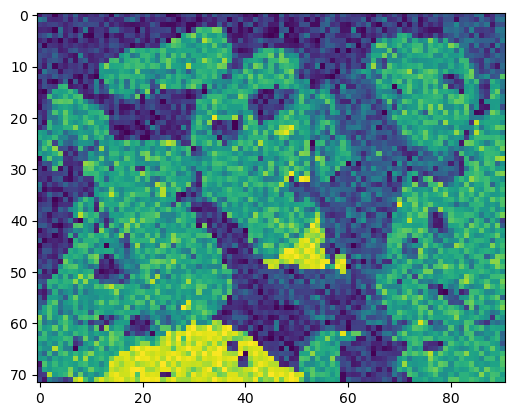

In [77]:
j = T@i
img_o = j.reshape(img_ds.shape)
plt.imshow(img_ds)
img_oo = convolve2d(img_ds,kernel)

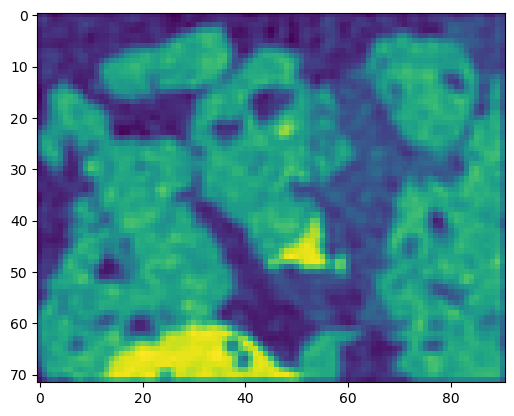

In [78]:
plt.imshow(img_oo)

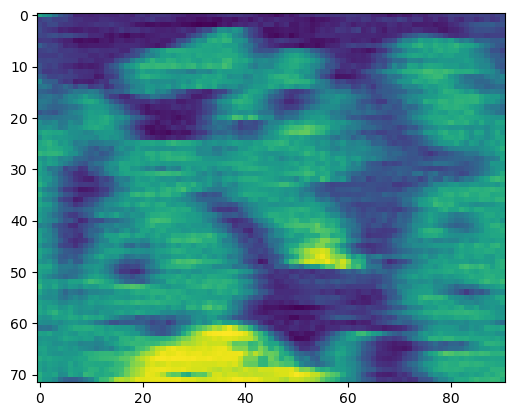

In [79]:
plt.imshow(img_o)

In [137]:
gaussian = lambda r2, sigma: np.exp( -0.5*r2/sigma**2 )
w = np.zeros((3,1))
for i in range(3):
    w[i] = gaussian(np.abs(i-1),0.5)
GaussianW = w*w.T
GaussianW = GaussianW/np.sum(GaussianW)
GaussianW

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

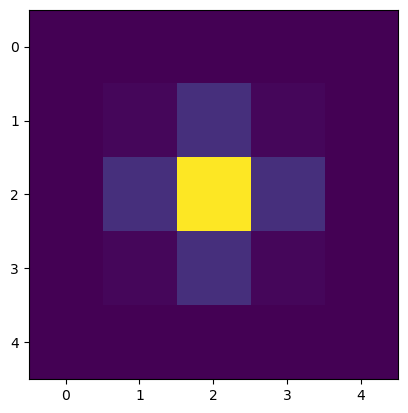

In [138]:
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = GaussianW
plt.imshow(kernel_)

In [139]:
np.sum(GaussianW)

1.0

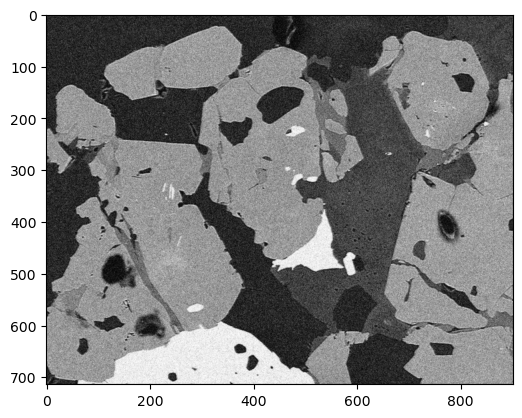

In [140]:
avg3 = convolve2d(img, GaussianW)
plt.imshow(avg3,cmap= plt.cm.gray)

In [141]:
import cv2

In [142]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

In [149]:
avg4 = cv2.GaussianBlur(img,(3,3),0)

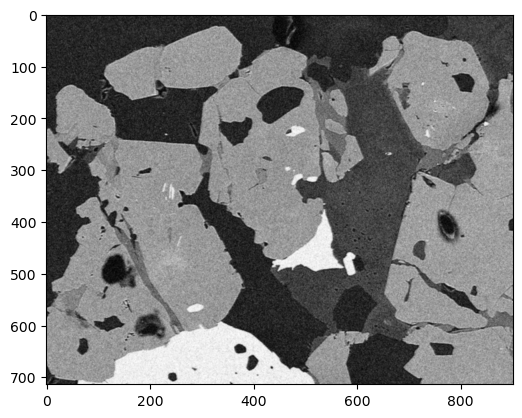

In [150]:
plt.imshow(avg4,cmap=plt.cm.gray)

In [151]:
np.mean(np.abs(avg3.astype('int')-avg4.astype('int')))

7.889525177440565

In [152]:
help(cv2.getGaussianKernel)

Help on built-in function getGaussianKernel:

getGaussianKernel(...)
    getGaussianKernel(ksize, sigma[, ktype]) -> retval
    .   @brief Returns Gaussian filter coefficients.
    .   
    .   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
    .   coefficients:
    .   
    .   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
    .   
    .   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
    .   
    .   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
    .   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
    .   You may also use the higher-level GaussianBlur.
    .   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
    .   @param sigma Gaussian standard deviation. If it is non-positive, it is computed f

In [153]:
G = cv2.getGaussianKernel(3,0)
G*G.T

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [154]:
sigma = 0.3*((3-1)/2-1)+0.8
sigma

0.8

In [155]:
Gw = G*G.T

In [156]:
avg5 = convolve2d(img, Gw)

In [157]:
np.mean(np.abs(avg5.astype('int')-avg4.astype('int')))

0.629114242811442

In [163]:
img

array([[ 15,  27,  41, ...,  32, 104,  64],
       [ 46,  62,  17, ...,  58,  66,  76],
       [ 58,  11,  19, ...,  97,  86,  43],
       ...,
       [  7,  65,  63, ..., 127,  85, 190],
       [ 40, 124,  48, ..., 146, 169, 187],
       [ 25,  99,  41, ..., 144, 164, 177]], dtype=uint8)

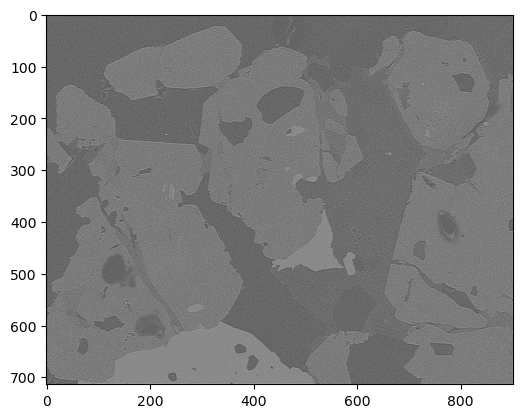

In [164]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
diff = convolve2d(img.astype('int'), kernel)
plt.imshow(diff,cmap=plt.cm.gray)

In [162]:
kernel

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [37]:
img

array([[ 15,  27,  41, ...,  32, 104,  64],
       [ 46,  62,  17, ...,  58,  66,  76],
       [ 58,  11,  19, ...,  97,  86,  43],
       ...,
       [  7,  65,  63, ..., 127,  85, 190],
       [ 40, 124,  48, ..., 146, 169, 187],
       [ 25,  99,  41, ..., 144, 164, 177]], dtype=uint8)